# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

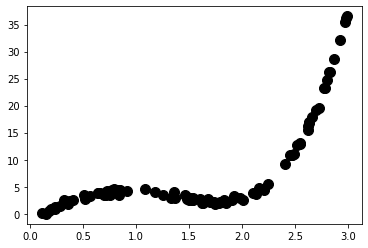

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([13.42511011,  9.17294469, 13.77907268,  4.32435715,  0.86972759,
        1.58080516, 20.70042509,  2.07071142,  5.40584513, 17.13539255,
        4.82443679,  5.2744579 , 18.40950084,  2.40391546,  2.77143094,
        4.70730552, 14.38548681, 19.58564599, 24.38653791,  1.68897837,
       16.5523667 ,  1.29618141,  4.10622831, 20.58646643,  3.24403123,
        1.08209035, 24.4092645 ,  2.1563693 ,  1.64435001,  0.62601488,
        5.7441258 ,  7.62297249,  2.05753269, 16.58619977,  1.03187838,
        1.28497603,  3.94538478,  5.47600099, 22.94112802, 21.60906809])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.8466850440407659
Explained variance score: 0.8466850440407659
Median absolute error: 2.63327660156118
Mean squared error: 18.37574064204982
Mean absolute errors: 3.2560026686398182


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
model1.predict(X_test)
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(X_train, y_train)
model3.predict(X_test)
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(X_train, y_train)
model4.predict(X_test)
model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(X_train, y_train)
model5.predict(X_test)
model25 = make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())
model25.fit(X_train, y_train)
model25.predict(X_test)

models = [model1,model2,model3,model4,model5,model25]

for elem in enumerate(models):
    print("model" + str(elem[0]))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, elem[1].predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, elem[1].predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, elem[1].predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, elem[1].predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, elem[1].predict(X_test)) ))
    

model0
Explained variance score: 0.5330341924970398
Explained variance score: 0.5330341924970398
Median absolute error: 3.5738147725952727
Mean squared error: 61.6422210586893
Mean absolute errors: 5.620857620127306
model1
Explained variance score: 0.8466850440407659
Explained variance score: 0.8466850440407659
Median absolute error: 2.63327660156118
Mean squared error: 18.37574064204982
Mean absolute errors: 3.2560026686398182
model2
Explained variance score: 0.9947599667620041
Explained variance score: 0.9947599667620041
Median absolute error: 0.5316387861847662
Mean squared error: 0.6220239622000673
Mean absolute errors: 0.6139373208349366
model3
Explained variance score: 0.9986047431326378
Explained variance score: 0.9986047431326378
Median absolute error: 0.2781203569268764
Mean squared error: 0.15836480863121988
Mean absolute errors: 0.32171956134522767
model4
Explained variance score: 0.9987476176698563
Explained variance score: 0.9987476176698563
Median absolute error: 0.259465